In [213]:
!pip install pandas
import pandas as pd

data = pd.read_csv('./Iris.csv')
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [214]:
import random
import math

data1 = data.iloc[:, 1:5]

def kmeans(data,n_clusters, tol):
    c= []
    for i in range(n_clusters): 
        c.append([random.uniform(data.iloc[:,j].min(),data.iloc[:,j].max()) for j in range(len(data.columns))])

   

    distances = [[0 for i in range(n_clusters)] for j in range(len(data))]
    cluster = [-1 for i in range(len(data))]

    
    while True:
        for i in range(len(data)):
            dist = 1000
            for j in range(n_clusters):
                distances[i][j] = math.sqrt(sum([(data.iloc[i,k] - c[j][k])**2 for k in range(len(data.columns))]))
                if distances[i][j] < dist:
                    dist = distances[i][j]
                    cluster[i] = j

        new_c = [[0 for j in range(len(data.columns))] for i in range(n_clusters)]
        counter = [0 for i in range(n_clusters)]

        for i in range(len(cluster)):
            new_c[cluster[i]] =[new_c[cluster[i]][j] + [data.iloc[i,j] for j in range(len(data.columns))][j] for j in range(len(data.columns))]
            counter[cluster[i]] += 1

        for i in range(len(new_c)):
            for j in range(len(data.columns)):
                    if counter[i] != 0:
                        new_c[i][j] = new_c[i][j] / counter[i]
                    else:
                        new_c[i][j] = c[i][j]

        if math.sqrt(sum([sum([(c[j][k] - new_c[j][k])**2 for k in range(len(data.columns))]) for j in range(n_clusters)])) < tol:
            return cluster, new_c
        
        c = new_c
            
y_pred, centers = kmeans(data1,3,0.0001)


In [215]:
print(len(y_pred))
print(y_pred)

150
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]


In [216]:
true_labels = data.iloc[:, 5].values
print(true_labels)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [217]:
import numpy as np
for i in np.unique(true_labels):
    if i == 'Iris-setosa':
        true_labels[true_labels == i] = 0
    elif i == 'Iris-versicolor':
        true_labels[true_labels == i] = 1
    else:
        true_labels[true_labels == i] = 2


In [218]:
print(true_labels.dtype)


object


In [219]:
true_labels = true_labels.astype('int32')
print(true_labels.dtype)
print(true_labels)
print(len(true_labels))

int32
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150


In [220]:
y_pred = np.array(y_pred)

In [221]:
!pip install munkres
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

y_pred = translate_predicted_labels(y_pred, true_labels)
conf_matrix = confusion_matrix(true_labels, y_pred)
accuracy = accuracy_score(true_labels, y_pred)

print("Success Rate: ",accuracy)
print()
print("Confusion matrix: \n",conf_matrix)

map: 0 --> 1
map: 1 --> 0
map: 2 --> 2
Success Rate:  0.8866666666666667

Confusion matrix: 
 [[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


In [222]:
data_2 = data.iloc[:, 3:5]
print(data_2.head())

   PetalLengthCm  PetalWidthCm
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2


In [223]:
y_pred_2, centers2 = kmeans(data_2,3,0.0001)
y_pred_2 = np.array(y_pred_2)
y_pred_2 = translate_predicted_labels(y_pred_2, true_labels)
conf_matrix_2 = confusion_matrix(true_labels, y_pred_2)
accuracy_2 = accuracy_score(true_labels, y_pred_2)

print("Success Rate: ",accuracy_2)
print()
print("Confusion matrix: \n",conf_matrix_2)

map: 0 --> 2
map: 1 --> 0
map: 2 --> 1
Success Rate:  0.96

Confusion matrix: 
 [[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


Text(0, 0.5, 'Petal Width(cm)')

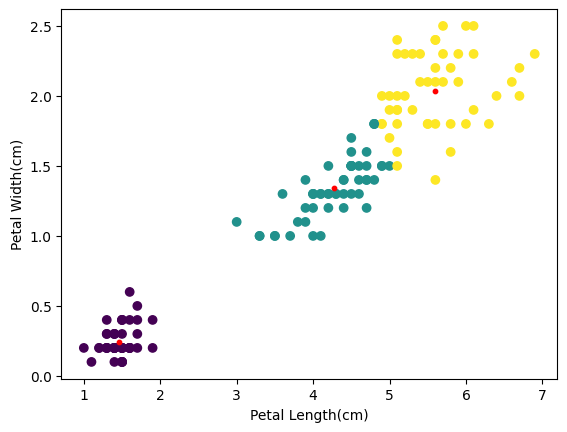

In [224]:
import matplotlib.pyplot as plt


plt.scatter(data_2.iloc[:, 0], data_2.iloc[:, 1], c=y_pred_2)
plt.scatter([centers2[i][0] for i in range(len(centers2))], [centers2[i][1] for i in range(len(centers2))], c='red', s=10)
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')   


Με κόκκινο χρώμα παρατηρούνται τα κέντρα των ομάδων ενώ με τα υπόλοιπα 3 χρώματα οι παρατηρήσεις που αντιστοιχούν σε κάθε ομάδα.

Εύκολα μπορούμε να παρατηρήσουμε πως το success rate χρησιμοποιώντας μόνο τα χαρακτηριστικά Petal Length και Petal Width είναι μεγαλύτερο σε σχέση με το success rate χρησιμοποιώντας και τα 4 χαρακτηριστικά. Αυτό μπορεί να οφείλετε σε πολλούς παράγοντες όπως στην παρουσία ακραίων τιμών και θορύβου στα 2 πρώτα χαρακτηριστικά(Sepal Length, Sepal Width) μιας και γνωρίζουμε πως ο αλγόριθμος K means είναι ευαίσθητος σε αυτά.

Επίσης, μέσω του confusion matrix μπορούμε να παρατηρήσουμε πως και στις 2 περιπτώσεις, όλοι οι κρίνοι οι οποίοι είναι Iris Setosa ομαδοποιούνται σωστά, ενώ για τους κρίνους οι οποίοι είναι Iris Versicolour, 48 ομαδοποιούνται σωστά, ενώ 3 ανάγονται λανθασμένα στην ομάδα 3 για την πρώτη περίπτωση ενώ για την δεύτερη περίπτωση 47 ομαδοποιούνται σωστά και 2 ανάγονται λανθασμένα στην ομάδα 3. Στην πρώτη περίπτωση μπορούμε να παρατηρήσουμε πως για τους κρίνους οι οποίοι είναι Iris Virginica 36 ομαδοποιούνται σωστά ενώ 14 ομαδοποιούνται λανθασμένα στην ομάδα 2. Στην δεύτερη περίπτωση μπορούμε να παρατηρήσουμε πως για τους κρίνους οι οποίοι είναι Iris Virginica 46 ομαδοποιούνται σωστά ενώ 4 ομαδοποιούνται λάθος στην ομάδα 2. Παρατηρούμε, ότι στις 2 περιπτώσεις έχουμε ακριβώς ίδια απόδοση ομαδοποίησης για τις παρατηρήσεις που αποτελούν Iris Setosa με βάση το confusion matrix ενώ για τις παρατηρήσεις που αποτελούν Iris Versicolour και Iris Virginica έχουμε καλύτερη ομαδοποίηση στην δεύτερη περίπτωση. Αυτό μπορεί να οφείλετε σε πολλούς παράγοντες όπως στην παρουσία ακραίων τιμών και θορύβου στα 2 πρώτα χαρακτηριστικά(Sepal Length, Sepal Width) μιας και γνωρίζουμε πως ο αλγόριθμος K means είναι ευαίσθητος σε αυτά. Αφού μόνο στις παρατηρήσεις που αποτελούν Iris Virginica έχουμε πολύ διαφορετικά αποτελέσματα στις 2 ομαδοποιήσεις και μια όχι τόσο καλή ομαδοποίηση των στοιχείων της για την πρώτη περίπτωση τότε πολύ πιθανόν οι ακραίες τιμές ή ο θόρυβος να βρίσκονται σε μεγαλύτερο βαθμό στα 2 πρώτα χαρακτηριστικά των παρατηρήσεων που αποτελούν αυτό το είδος κρίνου.